# Applied Machine Learning (CMT307)

**Student Number: C21034767**

**Student Name: Safi Ammar Mohammed**

Lecturer: Yuhua Li

Assessment Title: Implementation and Evaluation of a Case Study Using Machine
Learning Techniques

Assessment Number: 1


**University Email: MohammedS12@cardiff.ac.uk**

**Personal Email: ammar.imran71@gmail.com**

#### Question 2:

In this question, you will develop machine learning models to predict e-commerce visitor's purchasing intention. The given dataset Coursework_1_data.csv, which can be downloaded from Learning Central, contains shoppers’ online activity information including clickstream and session information data, where the last column Revenue represents visitor's purchasing intention. Your tasks will include data exploration, data pre-processing, machine learning method selection and implementation, and model performance evaluation. In addition to aforementioned tasks, you will write a concise report (around 1000 words, excluding tables and figures) to summarise your work and provide an analysis and discussion of the results.


#### Table of Contents:

1. Data Exploration
2. Data Pre-processing
3. Model Implementation
4. Performance Evaluation
5. Result Analysis and Discussion

#### Objective: 

To develop machine learning models to predict e-commerce visitor's purchasing intention.

In [195]:
#importing required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display as dy
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

%matplotlib inline

# 1. Data Exploration:

In [19]:
df = pd.read_csv("Coursework_1_data.csv")

In [24]:
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False)

print('\nInformation of the dataset:\n')
dy(df.info())


Information of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64

None

- The dataset contains 12330 redords and 18 columns including the target column.
- There are **7 'int64'**, **7 'float64'**, **2 'object'** and **2 'bool'** datatype attributes.

In [25]:
print('\nData Head:')
dy(df.head(5))

print('\nStatistics of the Dataset:')
dy(df.describe())


Data Head:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False



Statistics of the Dataset:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


The dataset does not contain any identifiable information and hence does not violate the law of GDPR (General Data Protection Regulation). Therefore we can proceed with the Data Exploration.

### Distributions using Histograms:

C:\Users\ammar\AppData\Local\Temp/ipykernel_22376/2099550231.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  print(df.hist(ax = ax))


[[<AxesSubplot:title={'center':'Administrative'}>
  <AxesSubplot:title={'center':'Administrative_Duration'}>
  <AxesSubplot:title={'center':'Informational'}>
  <AxesSubplot:title={'center':'Informational_Duration'}>]
 [<AxesSubplot:title={'center':'ProductRelated'}>
  <AxesSubplot:title={'center':'ProductRelated_Duration'}>
  <AxesSubplot:title={'center':'BounceRates'}>
  <AxesSubplot:title={'center':'ExitRates'}>]
 [<AxesSubplot:title={'center':'PageValues'}>
  <AxesSubplot:title={'center':'SpecialDay'}>
  <AxesSubplot:title={'center':'OperatingSystems'}>
  <AxesSubplot:title={'center':'Browser'}>]
 [<AxesSubplot:title={'center':'Region'}>
  <AxesSubplot:title={'center':'TrafficType'}> <AxesSubplot:>
  <AxesSubplot:>]]


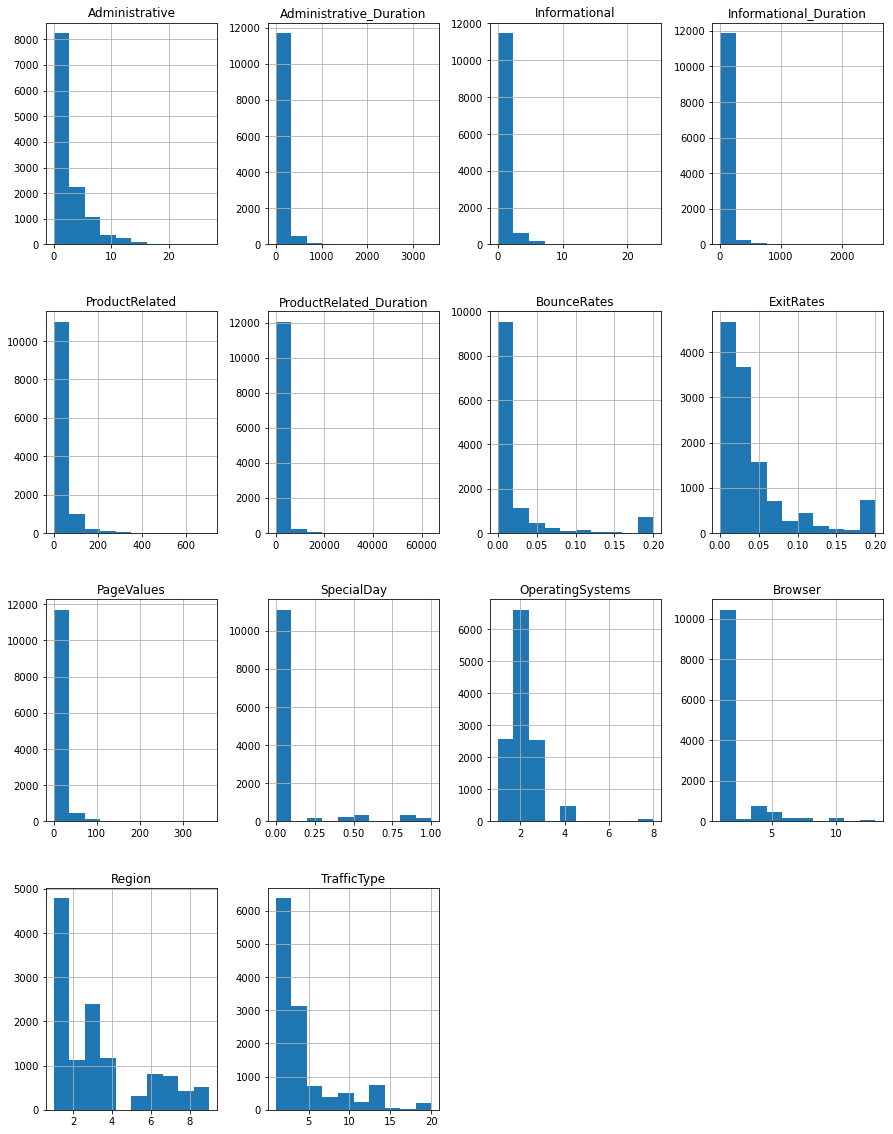

In [36]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
print(df.hist(ax = ax))

- We can get an idea of the distributions of each attribute from the histograms.

# 2. Data Pre-processing:

### Checking for Missing Data:

Checking for if there are missing values in each feature, 0 for no missing value or the number for the number of missing values.

In [30]:
dy(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

- The dataset does not contain any missing or null values.

### Encoding Categorical Features:

Most machine learning methods take only numerical data, except decision tree based methods which can take numerical and categorical features directly.

As we have categorical features in our dataset, we need to encode them before so we can use them in our analysis later.
We also downsample the dataset to reduce bias.

In [50]:
column_trans = make_column_transformer((OneHotEncoder(),['Month','OperatingSystems','Browser','VisitorType','Weekend']),remainder='passthrough')

# Dividing the dataset into Purchased and Not Purchased based on the revenue.
dataset_p = df[df.Revenue==True]
dataset_np = df[df.Revenue==False]

# Downsampled Dataset
dataset_p_down = resample(dataset_p,replace=False,n_samples=1000)
dataset_np_down = resample(dataset_np,replace=False,n_samples=5000)
dataset = pd.concat([dataset_p_down,dataset_np_down])

# Identifying the class label
X = dataset.drop(columns=['Revenue'])
y = dataset['Revenue']

# Encoding categorical features
column_trans.fit(X)
X = column_trans.transform(X)


### Feature Scaling:

Feature scaling is a neccessary steps for most machine learning methods in order to achieve good learning performance and faster learning process.

- We use min-max scaling to scale the features to a default range of [0,1].
- We have to split the dataset into training and testing set so that only features get scaled.

In [55]:
scalar = MinMaxScaler()

# Creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Center and normalize the data
scalar.fit(X)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

### Correlation Matrix:

- To have an idea of correlation between our variables we can plot the correlation matrix.

<AxesSubplot:>

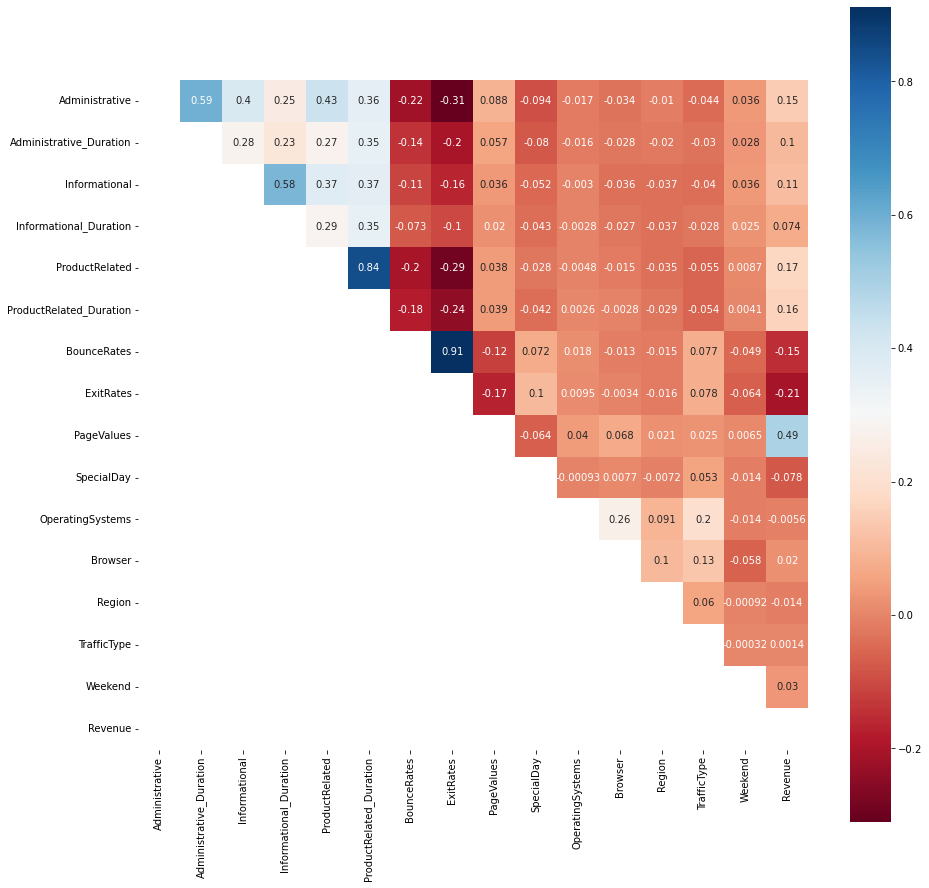

In [57]:
plt.subplots(figsize=(15,15))
matrix = np.tril(df.corr())
sns.heatmap(dataset.corr(), annot = True, cmap= 'RdBu',square=True,mask = matrix)

- The target is only correlated to a small number of variables in this dataset as seen in the last column.

### Principal Component Analysis:

- Principal Component Analysis is used to see a good representation of our dataset in two or three dimensions.

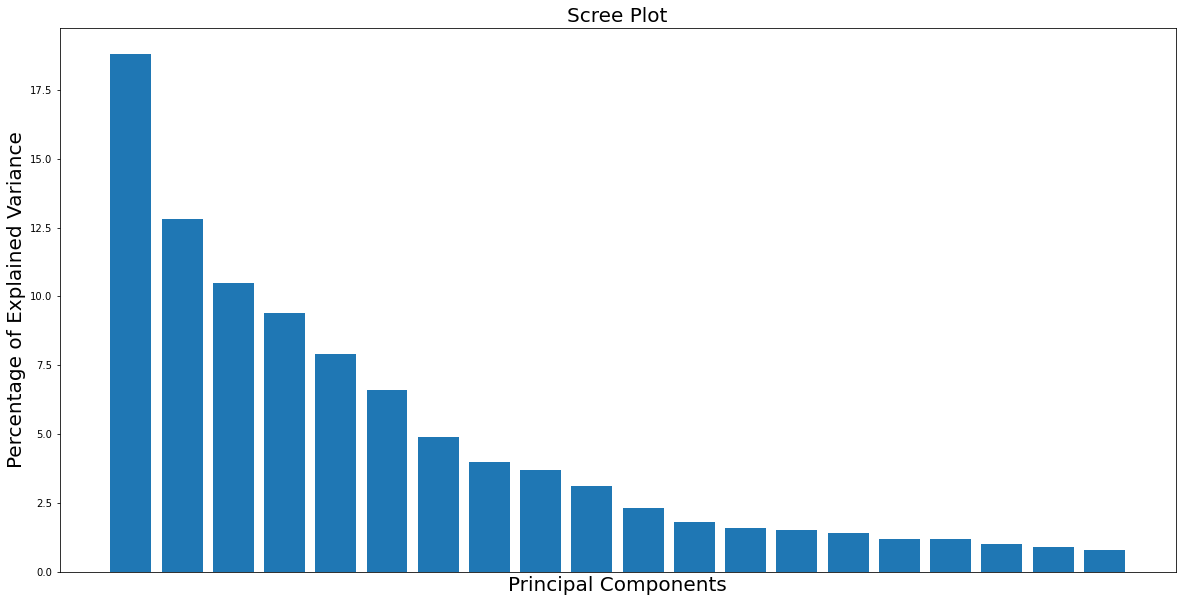

In [60]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(x) for x in range(1,len(per_var)+1)]
plt.rcParams['figure.figsize'] = (20, 10)
font=20
plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Percentage of Explained Variance', fontsize = font)
plt.xlabel('Principal Components', fontsize = font)
plt.title('Scree Plot', fontsize = font)
plt.show()

- Because the percentage of explained variance lowers slowly, it is not possible to represent well our dataset in two or three dimensions.
- The 2D PCA plot will be as follows.

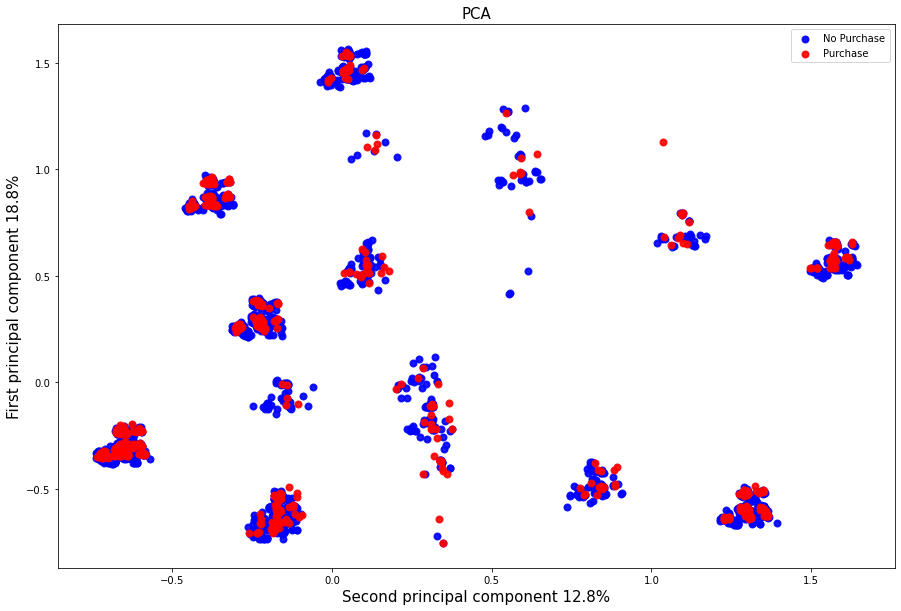

In [62]:
X_r = pca.fit(X_train).transform(X_train)
plt.figure()
colors = ['blue', 'red']
lw = 2
target_names= ["No Purchase","Purchase"]

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y_train == i, 0], X_r[y_train == i, 1], color=color, alpha=.9, lw=lw,
                label=target_name)

font=15
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA',fontsize=font)
pca100 = pca.explained_variance_ratio_
D1 = "First principal component " + str(round(pca100[0] * 100,1)) + "%"
D2 = "Second principal component " + str(round(pca100[1] * 100,1)) + "%"
plt.ylabel(D1,fontsize=font)
plt.xlabel(D2,fontsize=font)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

- There are 12 clusters that may correspond to the 12 months.

### Univariate Analysis:
- We can look at the dataset balance with a few bar plots.

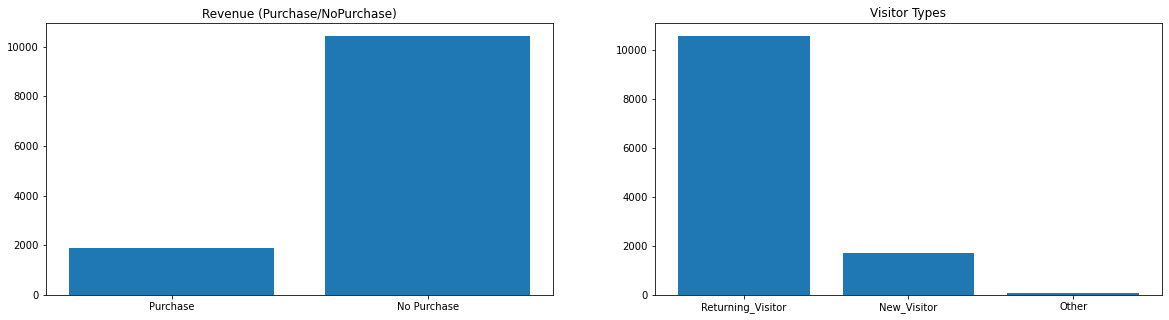

In [64]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(20,5)

#Visitor Types
axs[1].set_title("Visitor Types")
Vtype = ['Returning_Visitor','New_Visitor','Other']
count_vtype = [df['VisitorType'].value_counts()['Returning_Visitor'],
               df['VisitorType'].value_counts()['New_Visitor'],
               df['VisitorType'].value_counts()['Other']]
axs[1].bar(Vtype,count_vtype)

#Number of Purchased
axs[0].set_title("Revenue (Purchase/NoPurchase)")
TF = ["Purchase","No Purchase"]
TF_count = [df['Revenue'].value_counts()[True],df['Revenue'].value_counts()[False]]
axs[0].bar(TF,TF_count)

plt.show()

- There are approximately 5 times more negative entries.
- Most of the dataset is composed of Returning_Visitors

C:\Users\ammar\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Purchase each month')

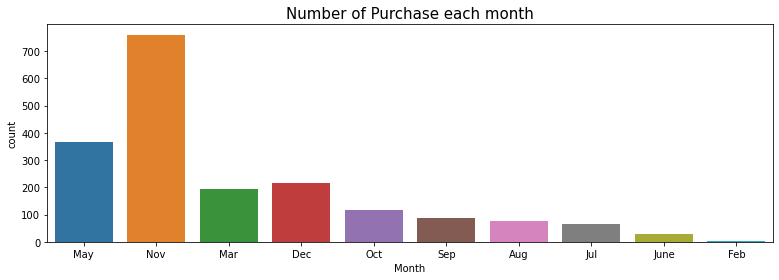

In [67]:
plt.figure(figsize=(13, 4))
sns.countplot(dataset_p.Month.dropna(), order = df.Month.value_counts().index);
plt.title('Number of Purchase each month', fontsize = 15)

- The number of purchase sessions are significantly high in November.

C:\Users\ammar\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of No Purchase each month')

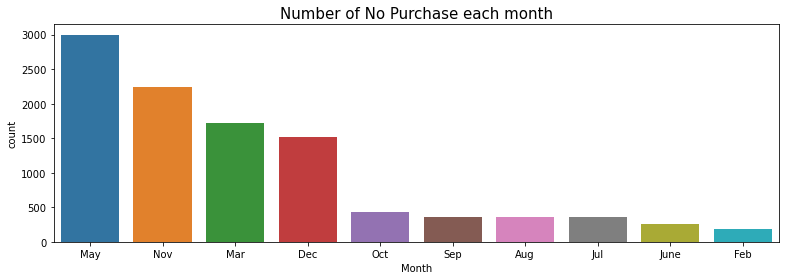

In [69]:
plt.figure(figsize=(13, 4))
sns.countplot(dataset_np.Month.dropna(), order = df.Month.value_counts().index);
plt.title('Number of No Purchase each month', fontsize = 15)

- The number of no purchase sessions is more important in May, November, March and December, showing that there are more visits to the site these months.

### Bivariate Analysis:

C:\Users\ammar\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


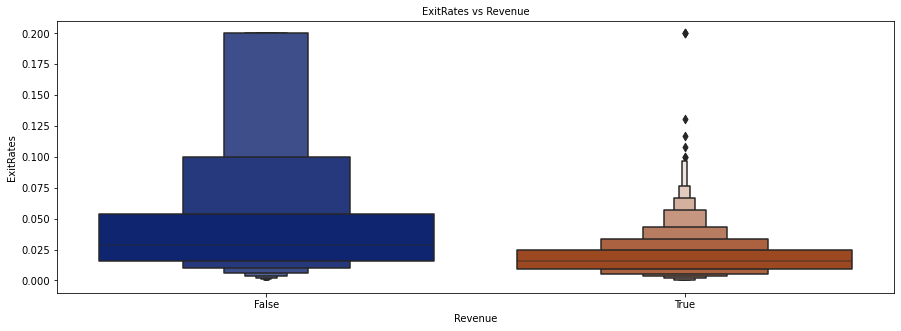

In [72]:
plt.rcParams['figure.figsize'] = (15, 5)
# exit rate vs revenue
sns.boxenplot(df['Revenue'], df['ExitRates'], palette = 'dark')
plt.title('ExitRates vs Revenue', fontsize = 10)
plt.xlabel('Revenue', fontsize = 10)
plt.ylabel('ExitRates', fontsize = 10)

plt.show()

- Differences in ExitRates are not that significant by Revenue. 
- Note that the ExitRates are a little lower when there is a 'Purchase'.

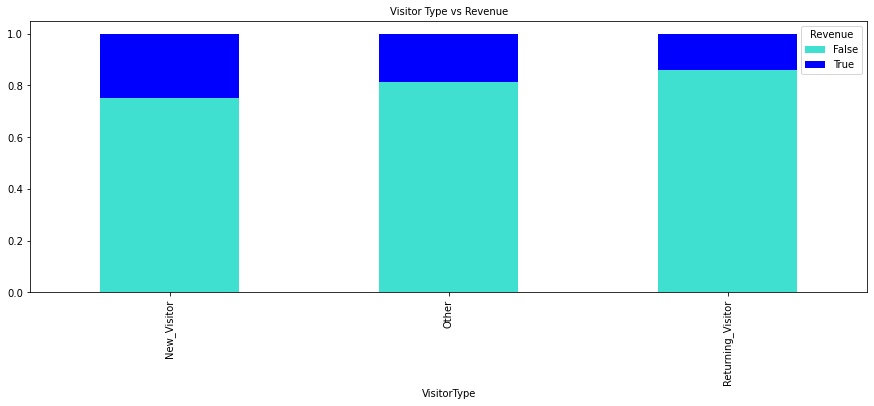

In [76]:
df1 = pd.crosstab(df['VisitorType'], df['Revenue'])
df1.div(df1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['turquoise', 'blue'])
plt.title('Visitor Type vs Revenue', fontsize = 10)
plt.show()

- This crosstab shows that the Visitor_Type has almost no influence on the number of Purchases.

### Multivariate Analysis:

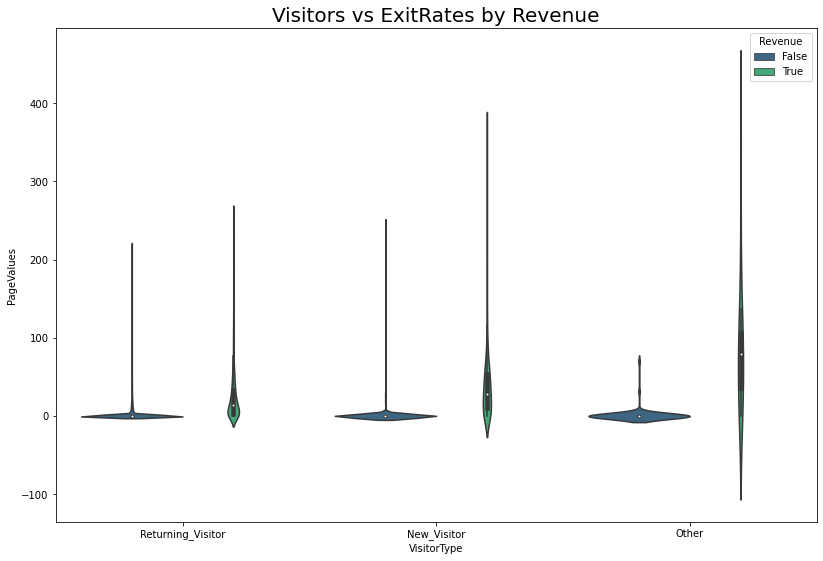

In [78]:
plt.rcParams['figure.figsize'] = (30, 20)
plt.subplot(2, 2, 1)
sns.violinplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Revenue'], palette = 'viridis')
plt.title('Visitors vs ExitRates by Revenue', fontsize = 20)
plt.show()

- The violin plot is shows the same pattern for each visitor type. 
- Page Value for most of the entries are close to 0 when the Revenue is False. But the values are spread out when Revenue is True. This may come from the definition of the PageValue, which gives a value close to 0 to pages which did not generate a lot of revenue.

# 3. Models Implementation:

### Selecting the Models:

C:\Users\ammar\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 
 Accuracy: 0.8633333333333333 
 F1-score: 0.3450479233226837 

K Nearest Neighbour 
 Accuracy: 0.8293333333333334 
 F1-score: 0.22891566265060243 

Support Vector Classification 
 Accuracy: 0.8433333333333334 
 F1-score: 0.09961685823754789 

Decision Tree 
 Accuracy: 0.87 
 F1-score: 0.5962732919254659 

Stochastic Gradient Descent 
 Accuracy: 0.8706666666666667 
 F1-score: 0.4049079754601227 

Random Forest 
 Accuracy: 0.9026666666666666 
 F1-score: 0.6507177033492823 



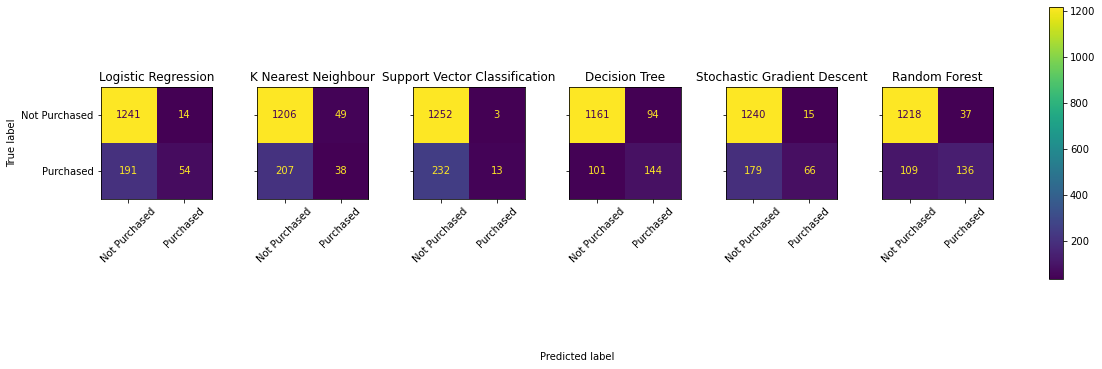

In [138]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbour": KNeighborsClassifier(),
    "Support Vector Classification": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Random Forest": RandomForestClassifier()
    }

f, axes = plt.subplots(1, 6, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(key, "\n Accuracy:",accuracy_score(y_test,y_pred),"\n F1-score:",f1_score(y_test,y_pred),"\n")
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["Not Purchased","Purchased"])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.43, -0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=1)


f.colorbar(disp.im_, ax=axes)
plt.show()

The three best performing classifiers based on accuracy, f1-score and correlation matrix are **Random Forest, Stochastic Gradient Descent and Decision Tree.**

### Optimising the Models:

#### 1) Stochastic Gradient Decent

In [126]:
parameters = [{
    "max_iter": [100,200,300],
    "loss": ["hinge","log","squared_hinge","perceptron"],
    "penalty": ["elasticnet", "l1", "l2"],
    "alpha": [0.0001, 0.001, 0.01, 0.1], 
    "learning_rate": ['constant', 'optimal', 'invscaling', 'adaptive'],
    "class_weight": [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
    "eta0": [1, 10] 
             }]
sgd = GridSearchCV(SGDClassifier(), parameters, cv=5, n_jobs=-1,scoring='f1', verbose=True)
sgd.fit(X_train,y_train)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1],
                          'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                           {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7}],
                          'eta0': [1, 10],
                          'learning_rate': ['constant', 'optimal', 'invscaling',
                                            'adaptive'],
                          'loss': ['hinge', 'log', 'squared_hinge',
                                   'perceptron'],
                          'max_iter': [100, 200, 300],
                          'penalty': ['elasticnet', 'l1', 'l2']}],
             scoring='f1', verbose=True)

In [127]:
print(sgd.best_params_)

{'alpha': 0.001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 10, 'learning_rate': 'adaptive', 'loss': 'perceptron', 'max_iter': 200, 'penalty': 'elasticnet'}


In [133]:
# Stochastic gradient descent with best parameters
gs_sgd = SGDClassifier(alpha =0.001, 
                       class_weight ={1: 0.7, 0: 0.3}, 
                       eta0 =10, 
                       learning_rate = 'adaptive', 
                       loss= 'perceptron', 
                       max_iter=300, 
                       penalty= 'elasticnet')
gs_sgd.fit(X_train, y_train)
print('Accuracy after optimisation is:')
gs_sgd.score(X_test,y_test)

Accuracy after optimisation is:


0.876

#### 2) Decision Tree

In [130]:
parameters = [{
    "criterion": ['gini','entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10), 
    "min_samples_leaf": [1,2,5,10],
             }]

dt = GridSearchCV(DecisionTreeClassifier(),
                  parameters, 
                  cv=5, n_jobs=-1,
                  scoring='f1', 
                  verbose=True)

dt.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\ammar\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ammar\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ammar\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\ammar\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a floa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 10),
                          'min_samples_leaf': [1, 2, 5, 10],
                          'min_samples_split': range(1, 10)}],
             scoring='f1', verbose=True)

In [131]:
print(dt.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [134]:
# Decision Tree with best parameters
gs_dt = DecisionTreeClassifier(criterion='gini', 
                               max_depth= 6, 
                               min_samples_leaf=1, 
                               min_samples_split=2,)
gs_dt.fit(X_train, y_train)
print('Accuracy after optimisation is:')
gs_dt.score(X_test,y_test)

Accuracy after optimisation is:


0.8953333333333333

#### 3) Random Forest

In [135]:
parameters = [{
    "criterion": ["gini",  "entropy"],
    "n_estimators": [200,400,600,800,1000],
    "max_features": ['auto', 'sqrt'],
    "max_depth": [5, 50, 100],
    "min_samples_split": [5,10,15,20,25,30], 
    "min_samples_leaf": [1,5,10,15,20],
    "bootstrap": [True, False]
             }]

rf = GridSearchCV(RandomForestClassifier(), 
                  parameters, 
                  cv=5, 
                  n_jobs=-1,
                  scoring='f1', 
                  verbose=True)

rf.fit(X_train,y_train)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 50, 100],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_leaf': [1, 5, 10, 15, 20],
                          'min_samples_split': [5, 10, 15, 20, 25, 30],
                          'n_estimators': [200, 400, 600, 800, 1000]}],
             scoring='f1', verbose=True)

In [136]:
print(rf.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 25, 'n_estimators': 200}


In [140]:
# Random forest with best parameters
gs_rf = RandomForestClassifier(bootstrap=False,
                               criterion='entropy',
                               max_depth= 100, 
                               max_features='sqrt', 
                               min_samples_leaf=1, 
                               min_samples_split=25, 
                               n_estimators=800)
gs_rf.fit(X_train, y_train)
print('Accuracy after optimisation is:')
gs_rf.score(X_test,y_test)

Accuracy after optimisation is:


0.9046666666666666

# 4. Performance Evaluation:

Four evaluation variables and a matrix are used to compare the models:
- **F1 score:** Can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
- **Accuracy:** How often a classifier is correct. Equal to (True Pos + True Neg)/total
- **Precision:** How often a prediction is correct. Equal to (True Positive/False Positive + True Positive) 
- **Recall:** True Positive Rate (Recall)= (True Positive/False Negative + True Positive)
- **Confusion Matrix:** Provides specific table layout of True Positive, True Negative, False Positive, and False Negative, a general visualization of the performance of a model.

### 1. Stochastic Gradient Decent

In [182]:
df_sgd_pred = gs_sgd.predict(X_test)

f1 = f1_score(y_test, df_sgd_pred)
f1sgd = round(f1,3)
print(f"The f1 score for Stochastic Gradient Descent is: {round(f1,3)}")

acc = accuracy_score(y_test, df_sgd_pred)
accsgd = round(acc,3)
print(f"The accuracy score for Stochastic Gradient Descent is: {round(acc,3)}")

precision = precision_score(y_test, df_sgd_pred)
precisionsgd = round(precision,3)
print(f"The precision score for Stochastic Gradient Descent is: {round(precision,3)}")

recall = recall_score(y_test, df_sgd_pred)
recallsgd = round(recall,3)
print(f"The recall score for Stochastic Gradient Descent is: {round(recall,3)}")

The f1 score for Stochastic Gradient Descent is: 0.662
The accuracy score for Stochastic Gradient Descent is: 0.876
The precision score for Stochastic Gradient Descent is: 0.597
The recall score for Stochastic Gradient Descent is: 0.743


**Confusion Matrix:**

Text(0.5, 1.1, 'Stochastic Gradient Descent Confusion Matrix')

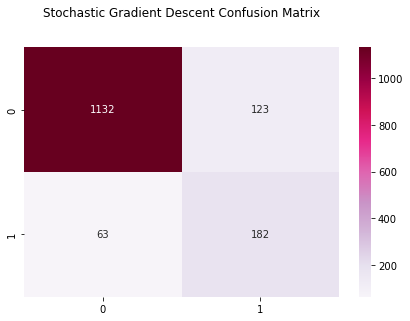

In [183]:
cnf_matrix_sgd = confusion_matrix(y_test, df_sgd_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_sgd), annot=True,cmap="PuRd" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Stochastic Gradient Descent Confusion Matrix', y=1.1)

- False Positive and False Negative values comprise almost 8.2%, 4.2% of the total testing dataset respectively which concludes Stochastic Gradient Descent technique is good for this dataset.

### 2. Decision Tree

In [184]:
df_dt_pred = gs_dt.predict(X_test)

f1 = f1_score(y_test, df_dt_pred)
f1dt = round(f1,3)
print(f"The f1 score for Decision Tree is: {round(f1,3)}")

acc = accuracy_score(y_test, df_dt_pred)
accdt = round(acc,3)
print(f"The accuracy score for Decision Tree is: {round(acc,3)}")

precision = precision_score(y_test, df_dt_pred)
precisiondt = round(precision,3)
print(f"The precision score for Decision Tree is: {round(precision,3)}")

recall = recall_score(y_test, df_dt_pred)
recalldt = round(recall,3)
print(f"The recall score for Decision Tree is: {round(recall,3)}")

The f1 score for Decision Tree is: 0.664
The accuracy score for Decision Tree is: 0.895
The precision score for Decision Tree is: 0.698
The recall score for Decision Tree is: 0.633


**Confusion Matrix:**

Text(0.5, 1.1, 'Decision Tree Confusion Matrix\n')

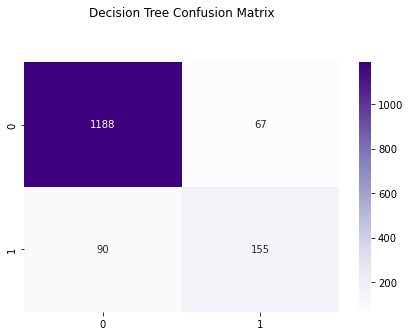

In [185]:
cnf_matrix_dt = confusion_matrix(y_test, df_dt_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=True,cmap="Purples" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree Confusion Matrix\n', y=1.1)

- False Positive and False Negative values comprise almost 4.46%, 6% of the total testing dataset respectively which concludes decision tree technique for this dataset to be one of the most reliable.

### 3. Random Forest

In [186]:
df_rf_pred = gs_rf.predict(X_test)

f1 = f1_score(y_test, df_rf_pred)
f1rf = round(f1,3)
print(f"The f1 score for Random Forest is: {round(f1,3)}")

acc = accuracy_score(y_test, df_rf_pred)
accrf = round(acc,3)
print(f"The accuracy score for Random Forest is: {round(acc,3)}")

precision = precision_score(y_test, df_rf_pred)
precisionrf = round(precision,3)
print(f"The precision score for Random Forest is: {round(precision,3)}")

recall = recall_score(y_test, df_rf_pred)
recallrf = round(recall,3)
print(f"The recall score for Random Forest is: {round(recall,3)}")

The f1 score for Random Forest is: 0.667
The accuracy score for Random Forest is: 0.905
The precision score for Random Forest is: 0.777
The recall score for Random Forest is: 0.584


**Confusion Matrix:**

Text(0.5, 1.1, 'Random Forest Confusion Matrix\n')

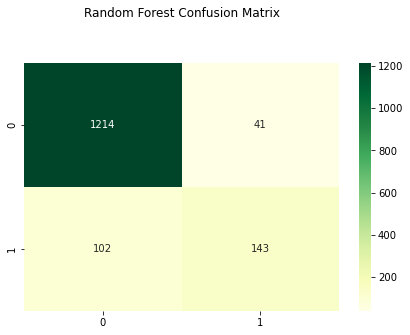

In [188]:
cnf_matrix_rf = confusion_matrix(y_test, df_rf_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True,cmap="YlGn" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest Confusion Matrix\n', y=1.1)

- False Positive and False Negative values comprise almost 2.73%, 6.8% of the total testing dataset respectively which concludes logistic regression technique for this dataset to be average reliable.

## Comparison:

Adding all the resultant values to a table for side by side analysis.

In [189]:
result = [(f1sgd,accsgd,precisionsgd,recallsgd),(f1dt,accdt,precisiondt,recalldt),(f1rf,accrf,precisionrf,recallrf)]
rdf = pd.DataFrame(data = result, columns = ['f1','Accuracy','Precision','Recall'], index = ['Stochastic Gradient Decent','Decision Tree','Random Forest'])
rdf

,f1,Accuracy,Precision,Recall
Stochastic Gradient Decent,0.662,0.876,0.597,0.743
Decision Tree,0.664,0.895,0.698,0.633
Random Forest,0.667,0.905,0.777,0.584


- The highest f1 value(0.667) is given by the **Random Forest** model.
- The maximum Accuracy(0.905) is given by the **Random Forest** model.
- The highest Precision value(0.777) is given by the **Random Forest** model.
- The highest Recall value(0.743) is given by the **Stochastic Gradient Descent** model.

The f1 scores do not vary among the models. Hence creating an ensemble model will be most beneficial for this dataset to keep bias to a minimum.

## Ensemble Model:

Combine the three best models to make a single ensemble model.

In [193]:
estimators=[('Random Forest',gs_rf),('Decision Tree',gs_dt),('Stochastic Gradient Descent',gs_sgd)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
y_pred = ensemble.fit(X_train, y_train).predict(X_test)

f1 = f1_score(y_test, y_pred)
f1ens = round(f1,3)
print(f"The F1-score is: {round(f1,3)}")

acc = accuracy_score(y_test, y_pred)
accens = round(acc,3)
print(f"The accuracy is: {round(acc,3)}")

precision = precision_score(y_test, y_pred)
precisionens = round(precision,3)
print(f"The precision is: {round(precision,3)}")

recall = recall_score(y_test, y_pred)
recallens = round(recall,3)
print(f"The recall is: {round(recall,3)}")

The F1-score is: 0.672
The accuracy is: 0.899
The precision is: 0.712
The recall is: 0.637


### Cross Validation of Ensemble Model:

Cross Validation is used to assess the predictive performance of the models and to judge how they perform outside the sample to a new data set.

In [196]:
cv_results = cross_val_score(ensemble, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of the ensemble model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

Cross-validated scores: [0.8925     0.89583333 0.885      0.90666667 0.90333333]
The Accuracy of the ensemble model with Cross Validation is: 89.67%


# 5. Result Analysis and Discussion:

The final model is a combination of the three best performing models which are:

- Random Forest
- Decision Tree
- Stochastic Gradient Descent

The accuracy and F1-score achieved are **89.67** and **0.672** respectvely.

(Result Analysis and Discussion continues in the PDF report...)